<a href="https://colab.research.google.com/github/asmi-0402/BioSeq-Analyzer-Modular-Python-Pipeline-for-Sequence-Analysis/blob/main/biopython_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#asmi chakraborty
#install dependencies

!pip install --quiet biopython matplotlib logomaker seaborn
print("Installed: biopython, matplotlib, logomaker, seaborn")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 23.7 MB/s eta 0:00:00
Installed: biopython, matplotlib, logomaker, seaborn


In [ ]:
#asmi chakraborty
#imports + set-up

import os
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker
import pandas as pd

from Bio import SeqIO, Align, Entrez
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqUtils import gc_fraction
from Bio.Seq import Seq
from collections import Counter

# Setup email for NCBI Entrez
Entrez.email = "asmichack@gmail.com"

def safe_mkdir(path):
    os.makedirs(path, exist_ok=True)


In [ ]:
#asmi chakraborty
#load FASTA files

# HBV sequence (DNA)
hbv_seq = (
"ATGGAGAGCACAACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTCTTGTTGACAA"
"GAATCCTCACAATACCACAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCTAGGGGGAGCACCCAC"
"GTGTCCTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTGTCCTCCAATTTGTCCT"
"GGCTATCGCTGGATGTGTCTGCGGCGTTTTATCATATTCCTCTTCATCCTGCTTCTATGCCTCATCTTCT"
"TGTTGGGTCTTCTGGACTACCAAGGTATGTTGCCCGTTTGTCCTCTACTTCCAGGATCATCAACTACCAG"
"CACGGGACCATGCAAAACCTGCACGATTCCTGCTCAAGGAACCTCTATGTTTCCCTCTTGTTGCTGTACA"
"AAACCTTCGGACGGAAACTGCACTTGTATTCCCATCCCATCATCCTGGGCTTTCGCAAGATTCCTATGGG"
"AGTGGGCCTCAGTCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGTAGGGCTTTC"
"CCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAACATCTTGAGT"
"CCCTTTTTACCTCTATTACCAATTTTCTTTTGTCTTTGGGTATACATT"
)

with open("central_dogma.fasta", "w") as fh:
    fh.write(">HBV_S_gene\n")
    for i in range(0, len(hbv_seq), 70):
        fh.write(hbv_seq[i:i+70] + "\n")

# Caspase-3 (protein)
_2xyg = (
">Chain_A\n"
"SGISLDNSYKMDYPEMGLCIIINNKNFHKSTGMTSRSGTDVDAANLRETFRNLKYEVRNKNDLTREEIVELMRDVSKEDHSKRSSFVCVLLSHGEEGIIFGTNGPVDLKKITNFFRGDRCRSLTGKPKLFIIQACRGTELDCGIET\n"
">Chain_B\n"
"HKIPVEADFLYAYSTAPGYYSWRNSKDGSWFIQSLCAMLKQYADKLEFMHILTRVNRKVATEFESFSFDATFHAKKQIPCIVSMLTKELYFYH\n"
)
with open("2xyg_chains.fasta", "w") as fh:
    fh.write(_2xyg)

print("FASTA files created: central_dogma.fasta, 2xyg_chains.fasta")


FASTA files created: central_dogma.fasta, 2xyg_chains.fasta


DNA (first 60bp): ATGGAGAGCACAACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTC
mRNA (first 60nt): AUGGAGAGCACAACAUCAGGAUUCCUAGGACCCCUGCUCGUGUUACAGGCGGGGUUUUUC
Protein (first 60aa): MESTTSGFLGPLLVLQAGFFLLTRILTIPQSLDSWWTSLNFLGGAPTCPGQNSQSPTSNH


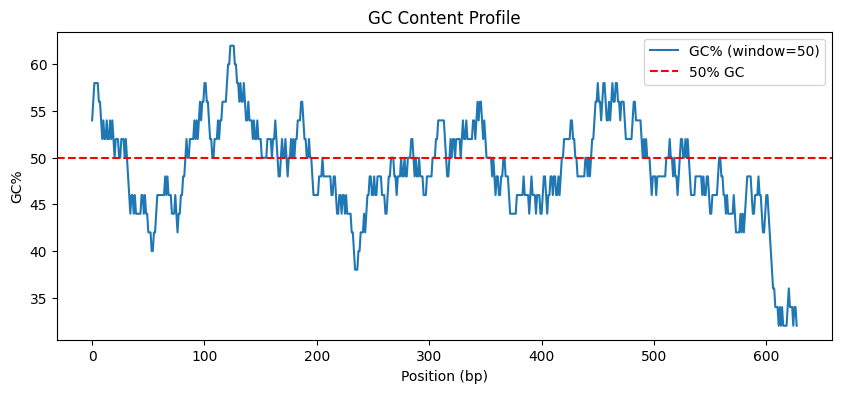

In [ ]:
#asmi chakraborty
#central dogma + gc plot

records = list(SeqIO.parse("central_dogma.fasta", "fasta"))
dna = records[0].seq
dna = dna[:len(dna) - len(dna)%3]  # trim

mrna = dna.transcribe()
protein = dna.translate()

print("DNA (first 60bp):", dna[:60])
print("mRNA (first 60nt):", mrna[:60])
print("Protein (first 60aa):", protein[:60])

# GC content profile
window = 50
gc_vals = [gc_fraction(dna[i:i+window])*100 for i in range(len(dna)-window)]

plt.figure(figsize=(10,4))
plt.plot(gc_vals, label="GC% (window=50)")
plt.axhline(50, color="red", linestyle="--", label="50% GC")
plt.xlabel("Position (bp)")
plt.ylabel("GC%")
plt.title("GC Content Profile")
plt.legend()
plt.show()


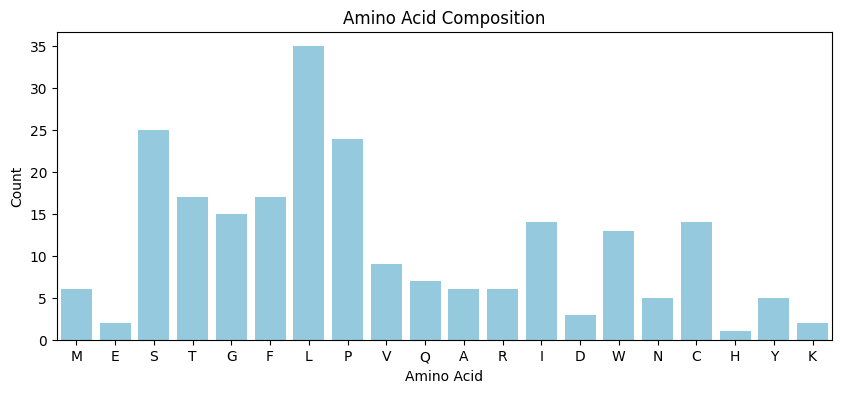

<Figure size 1000x300 with 0 Axes>

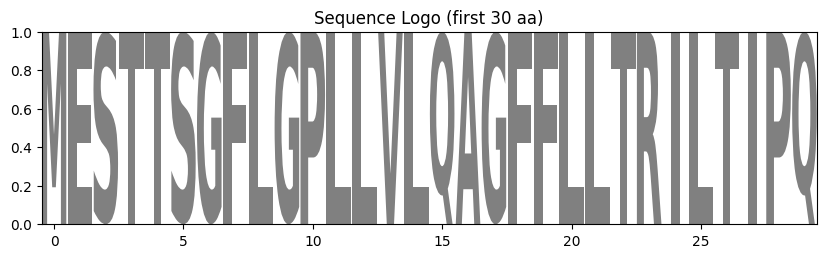

In [ ]:
#asmi chakraborty
#amino acid frequency + sequence logo

# 1. Amino acid frequency
aa_counts = Counter(str(protein))
plt.figure(figsize=(10,4))
sns.barplot(x=list(aa_counts.keys()), y=list(aa_counts.values()), color="skyblue")
plt.title("Amino Acid Composition")
plt.xlabel("Amino Acid")
plt.ylabel("Count")
plt.show()

# 2. Sequence Logo (first 30 aa)
logo_seq = str(protein)[:30]
counts_df = logomaker.alignment_to_matrix([logo_seq], to_type="counts")

plt.figure(figsize=(10,3))
logomaker.Logo(counts_df)
plt.title("Sequence Logo (first 30 aa)")
plt.show()


target            0 SGISLDNSY-KMDY-P-EMGLCIIINNKN--FHK----ST--GMT--S-R-SGT-DVDAA
                  0 ----------|----|-|-------------|------||--|----|-|-|---|----
query             0 ---------HK---IPVE-----------ADF--LYAYSTAPG--YYSWRNS--KD----

target           44 NLRET---FRN---L----K-YEVRNKN-D-LTREE---IVELM-RDVS--K---EDH--
                 60 --------|-----|----|-|-------|-|--|----|--|--|-|---|---|----
query            27 -----GSWF--IQSLCAMLKQY------ADKL--E-FMHI--L-TR-V-NRKVATE--FE

target           80 SKRSSFVCVLLSHGEEGIIFGTNGPVDL-----KK-ITNFFRGDR-CR--S-LTGKPKLF
                120 |----|-----|-------|------|------||-|---------|---|-||-|----
query            64 S----F-----S-------F------D-ATFHAKKQI--------PC-IVSMLT-K----

target          130 IIQACRGTELDCGIET---- 146
                180 --------||---------- 200
query            87 --------EL------YFYH  93



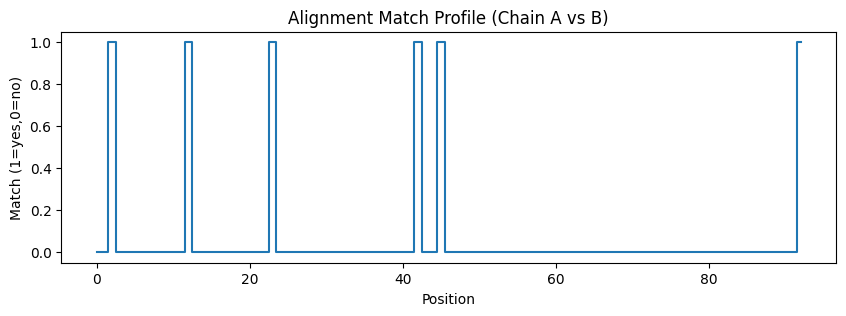

In [ ]:
#asmi chakraborty
#pairwise alignment visualization

chains = list(SeqIO.parse("2xyg_chains.fasta", "fasta"))
seq1, seq2 = chains[0].seq, chains[1].seq

aligner = Align.PairwiseAligner()
aligner.mode = "global"
alignment = aligner.align(seq1, seq2)[0]

print(alignment)

# Match profile
match_profile = [1 if a==b else 0 for a,b in zip(str(seq1[:len(seq2)]), str(seq2))]
plt.figure(figsize=(10,3))
plt.plot(match_profile, drawstyle="steps-mid")
plt.title("Alignment Match Profile (Chain A vs B)")
plt.xlabel("Position")
plt.ylabel("Match (1=yes,0=no)")
plt.show()


In [ ]:
#asmi chakraborty
#run BLASTp on protein

print("⏳ Running BLASTp on HBV protein sequence...")
result_handle = NCBIWWW.qblast("blastp", "nr", protein)

# Save raw results
with open("blast_results.xml", "w") as out_handle:
    out_handle.write(result_handle.read())
result_handle.close()
print(" BLAST search completed and saved to blast_results.xml")


⏳ Running BLASTp on HBV protein sequence...
 BLAST search completed and saved to blast_results.xml


  Accession                                              Title   Score  \
0  BAN05204  dbj|BAN05204.1| S, partial [Hepatitis B virus]...  1128.0   
1  ACJ48682  gb|ACJ48682.1| middle S protein [Hepatitis B v...  1129.0   
2  XWX06379  gb|XWX06379.1| middle S protein [Hepatitis B v...  1128.0   
3  ACJ48683  gb|ACJ48683.1| S protein [Hepatitis B virus] >...  1122.0   
4  ACG59579  gb|ACG59579.1| middle S protein [Hepatitis B v...  1128.0   

         E-value  Identity  Align Length  
0  1.121970e-154       226           226  
1  5.410840e-154       225           226  
2  8.911430e-154       224           226  
3  9.220550e-154       225           226  
4  9.728350e-154       224           226  


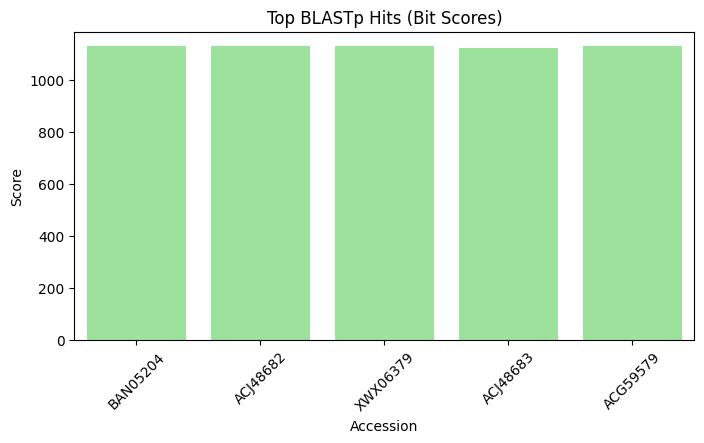

In [ ]:
#asmi chakraborty
#parse BLAST result

blast_records = NCBIXML.parse(open("blast_results.xml"))
blast_record = next(blast_records)

# Top 5 hits summary
hits = []
for alignment in blast_record.alignments[:5]:
    for hsp in alignment.hsps:
        hits.append({
            "Accession": alignment.accession,
            "Title": alignment.title[:80]+"...",
            "Score": hsp.score,
            "E-value": hsp.expect,
            "Identity": hsp.identities,
            "Align Length": hsp.align_length
        })

df_hits = pd.DataFrame(hits)
print(df_hits)

# Barplot of bit scores
plt.figure(figsize=(8,4))
sns.barplot(x="Accession", y="Score", data=df_hits, color="lightgreen")
plt.title("Top BLASTp Hits (Bit Scores)")
plt.xticks(rotation=45)
plt.show()
